In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/DIS.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-26,137.710007,138.199997,132.259995,133.600006,133.600006,14569900
1,2022-01-27,135.070007,137.910004,134.020004,135.419998,135.419998,11913900
2,2022-01-28,135.210007,138.690002,133.559998,138.630005,138.630005,10011700
3,2022-01-31,138.860001,143.149994,138.470001,142.970001,142.970001,10185500
4,2022-02-01,143.020004,144.690002,142.250000,144.490005,144.490005,8573300


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-01-19,98.120003,99.449997,97.120003,99.080002,99.080002,10973600
247,2023-01-20,100.339996,103.589996,99.300003,103.480003,103.480003,14540500
248,2023-01-23,103.290001,105.949997,102.919998,105.690002,105.690002,11479100
249,2023-01-24,105.389999,108.440002,102.000000,106.000000,106.000000,8606700
250,2023-01-25,104.959999,108.160004,104.180000,108.120003,108.120003,10008035


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,111.179243,112.612510,109.502670,111.037171,111.037171,1.261132e+07
std,18.261379,18.415942,18.063240,18.188648,18.188648,7.601179e+06
min,85.250000,86.690002,84.070000,84.169998,84.169998,5.858800e+06
25%,96.790001,98.029999,95.400002,96.470001,96.470001,8.610850e+06
50%,105.449997,107.059998,103.959999,105.690002,105.690002,1.093750e+07
75%,122.610000,123.875000,121.134998,122.165001,122.165001,1.391295e+07
max,156.020004,157.500000,153.750000,156.350006,156.350006,7.027350e+07


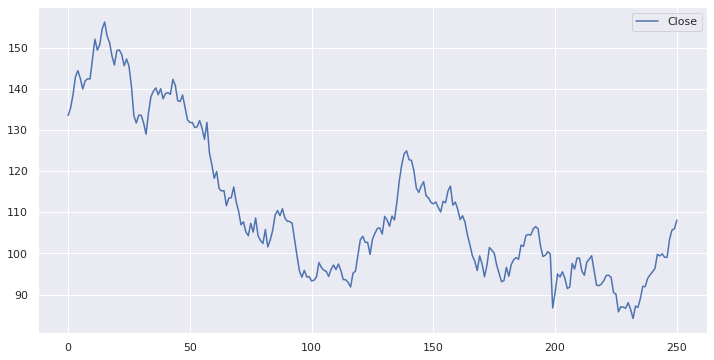

In [6]:
df[['Close']].plot(figsize=(12,6));


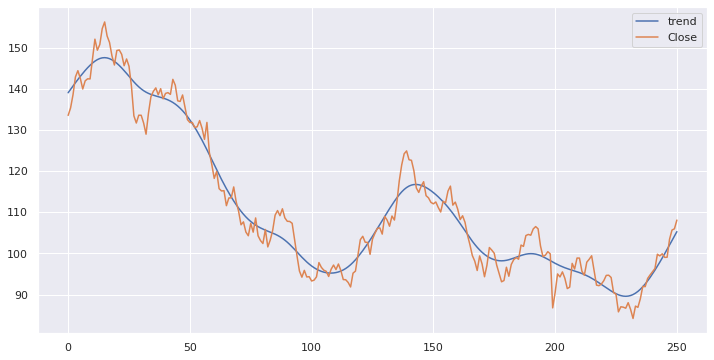

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.4519796267695606,
 0.5571186495993457,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1093.296557138138)

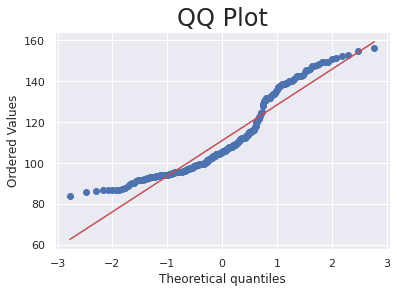

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


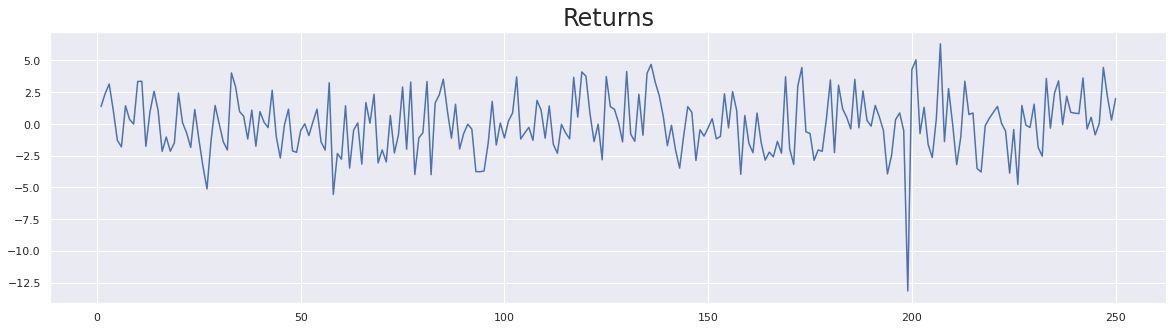

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


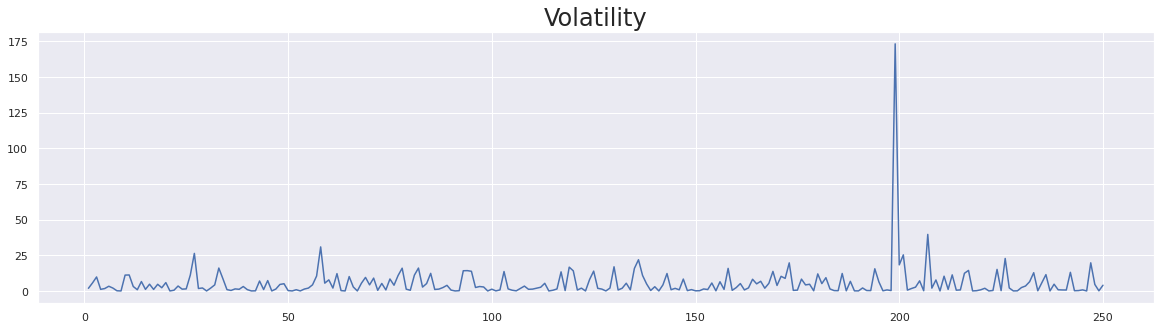

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

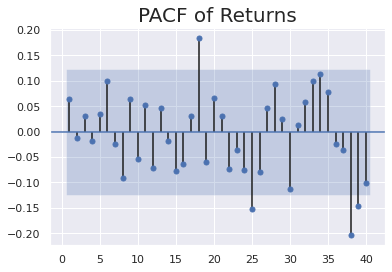

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

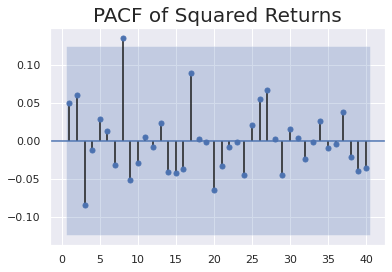

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 12.9 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 568.0511843660234
Iteration:      2,   Func. Count:     10,   Neg. LLF: 581.7304406602319
Iteration:      3,   Func. Count:     15,   Neg. LLF: 567.8373957570668
Iteration:      4,   Func. Count:     20,   Neg. LLF: 567.3038686750842
Iteration:      5,   Func. Count:     25,   Neg. LLF: 568.4603464330894
Iteration:      6,   Func. Count:     30,   Neg. LLF: 566.9873282096221
Iteration:      7,   Func. Count:     34,   Neg. LLF: 566.9871765171692
Iteration:      8,   Func. Count:     38,   Neg. LLF: 566.9871758421641
Optimization terminated successfully    (Exit mode 0)
            Current function value: 566.9871758421641
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -566.987
Distribution:                  Normal   AIC:                           1139.97
Method:            Maximum Likelihood   BIC:                           1150.54
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0627      0.147     -0.425      0.671 [ -0.352,  0.226]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          5.3326      0.880      6.061  1.357e-09      [  3.608,  7.057]
alpha[1]       0.0250  3.131e-02      0.799      0.425 [-3.636e-02,8.637e-02]
=============================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 567.0554287251457
Optimization terminated successfully    (Exit mode 0)
            Current function value: 566.7247572137234
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -566.725
Distribution:                  Normal   AIC:                           1141.45
Method:            Maximum Likelihood   BIC:                           1155.54
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0689      0.148     -0.467      0.640 [ -0.358,  0.220]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          5.2422      0.906      5.786  7.205e-09      [  3.466,  7.018]
alpha[1]       0.0206  2.620e-02      0.788      0.431 [-3.072e-02,7.199e-02]
alpha[2]       0.0192  2.255e-02      0.850      0.395 [-2.502e-02,6.337e-02]
=============================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 98184.47967568683
Iteration:     10,   Func. Count:     69,   Neg. LLF: 566.724803690488
Optimization terminated successfully    (Exit mode 0)
            Current function value: 566.7247574453154
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -566.725
Distribution:                  Normal   AIC:                           1143.45
Method:            Maximum Likelihood   BIC:                           1161.06
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0689      0.148     -0.464      0.643 [ -0.360,  0.222]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          5.2421      0.897      5.845  5.062e-09      [  3.484,  7.000]
alpha[1]       0.0207  2.581e-02      0.800      0.423 [-2.992e-02,7.124e-02]
alpha[2]       0.0192  2.228e-02      0.861      0.389 [-2.449e-02,6.283e-02]
alpha[3]       0.0000  5.092e-02      0.000      1.000 [-9.980e-02,9.980e-02]
=============================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     89,   Neg. LLF: 852.4976898855807
Iteration:     10,   Func. Count:    174,   Neg. LLF: 605.4207693949456
Iteration:     15,   Func. Count:    261,   Neg. LLF: 562.5053985973952
Optimization terminated successfully    (Exit mode 0)
            Current function value: 562.5046365954573
            Iterations: 19
            Function evaluations: 324
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -562.505
Distribution:                  Normal   AIC:                           1155.01
Method:            Maximum Likelihood   BIC:                           1207.83
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0890      0.181     -0.492      0.623 [ -0.443,  0.265]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.5707      1.899      1.880  6.006e-02      [ -0.151,  7.293]
alpha[1]       0.0373  4.157e-02      0.898      0.369   [-4.416e-02,  0.119]
alpha[2]       0.0138  2.539e-02      0.545      0.585 [-3.591e-02,6.361e-02]
alpha[3]   1.4089e-11  6.050e-02  2.329e-10      1.000      [ -0.119,  0.119]
alpha[4]   4.8279e-12      0.326  1.480e-11      1.000      [ -0.639,  0.639]
alpha[5]   1.7632e-12  9.163e-02  1.924e-11      1.000      [ -0.180,  0.180]
alpha[6]   5.6070e-03  3.213e-02      0.175      0.861 [-5.737e-02,6.858e-02]
alpha[7]   6.5051e-12  6.501e-02  1.001e-10      1.000      [ -0.127,  0.127]
alpha[8]       0.0360  4.863e-02      0.740      0.459   [-5.934e-02,  0.131]
alpha[9]   5.0236e-12      0.194  2.585e-11      1.000      [ -0.381,  0.381]
alpha[10]  1.8280e-03  2.791e-02  6.551e-02      0.948 [-5.287e-02,5.652e-02]
alpha[11]  4.7756e-12  4.514e-02  1.058e-10      1.000 [-8.848e-02,8.848e-02]
alpha[12]  8.5559e-03  7.175e-02      0.119      0.905      [ -0.132,  0.149]
alpha[13]      0.2709      0.272      0.995      0.320      [ -0.263,  0.805]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 63443578.60805951
Optimization terminated successfully    (Exit mode 0)
            Current function value: 565.1258708148023
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -565.126
Distribution:                  Normal   AIC:                           1138.25
Method:            Maximum Likelihood   BIC:                           1152.34
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0733      0.152     -0.482      0.630 [ -0.371,  0.225]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0119  9.103e-02      0.130      0.896      [ -0.167,  0.190]
alpha[1]       0.0000  2.659e-02      0.000      1.000 [-5.211e-02,5.211e-02]
beta[1]        1.0000  4.053e-02     24.674 2.016e-134      [  0.921,  1.079]
=============================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 565.1326285019884
Iteration:     10,   Func. Count:     71,   Neg. LLF: 565.1331518020654
Iteration:     15,   Func. Count:    102,   Neg. LLF: 565.1258703349605
Optimization terminated successfully    (Exit mode 0)
            Current function value: 565.1258707096024
            Iterations: 16
            Function evaluations: 102
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -565.126
Distribution:                  Normal   AIC:                           1140.25
Method:            Maximum Likelihood   BIC:                           1157.86
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0732      0.148     -0.494      0.621 [ -0.363,  0.217]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0119  3.850e-02      0.309      0.758 [-6.357e-02,8.733e-02]
alpha[1]   2.0512e-10  4.164e-03  4.926e-08      1.000 [-8.161e-03,8.161e-03]
beta[1]        1.0000      0.324      3.084  2.039e-03      [  0.365,  1.635]
beta[2]    1.7234e-06      0.326  5.288e-06      1.000      [ -0.639,  0.639]
=============================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 569.9609785807692
Iteration:     10,   Func. Count:     78,   Neg. LLF: 565.1159781489649
Optimization terminated successfully    (Exit mode 0)
            Current function value: 565.1159779799132
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -565.116
Distribution:                  Normal   AIC:                           1142.23
Method:            Maximum Likelihood   BIC:                           1163.36
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0731      0.153     -0.478      0.632 [ -0.373,  0.226]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0354      0.183      0.194      0.846      [ -0.323,  0.393]
alpha[1]       0.0000  2.237e-03      0.000      1.000 [-4.384e-03,4.384e-03]
beta[1]    4.1961e-07  1.381e-02  3.037e-05      1.000 [-2.708e-02,2.708e-02]
beta[2]        0.0000  8.762e-03      0.000      1.000 [-1.717e-02,1.717e-02]
beta[3]        1.0000  3.512e-02     28.471 2.655e-178      [  0.931,  1.069]
=============================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 566.924450469358
Iteration:     10,   Func. Count:     67,   Neg. LLF: 566.72477012576
Optimization terminated successfully    (Exit mode 0)
            Current function value: 566.7247576498941
            Iterations: 12
            Function evaluations: 78
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -566.725
Distribution:                  Normal   AIC:                           1143.45
Method:            Maximum Likelihood   BIC:                           1161.06
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0690      0.148     -0.466      0.641 [ -0.359,  0.221]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          5.2421      3.152      1.663  9.633e-02      [ -0.936, 11.421]
alpha[1]       0.0206  2.665e-02      0.774      0.439 [-3.161e-02,7.286e-02]
alpha[2]       0.0192  1.642e-02      1.168      0.243 [-1.301e-02,5.135e-02]
beta[1]        0.0000      0.527      0.000      1.000      [ -1.033,  1.033]
=============================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 566.299615728713
Iteration:     10,   Func. Count:     82,   Neg. LLF: 566.2787551128317
Iteration:     15,   Func. Count:    120,   Neg. LLF: 565.1258717974183
Optimization terminated successfully    (Exit mode 0)
            Current function value: 565.1258712516429
            Iterations: 16
            Function evaluations: 127
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -565.126
Distribution:                  Normal   AIC:                           1142.25
Method:            Maximum Likelihood   BIC:                           1163.38
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0731      0.150     -0.487      0.626 [ -0.367,  0.221]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0119  6.926e-02      0.172      0.864      [ -0.124,  0.148]
alpha[1]       0.0000  1.617e-02      0.000      1.000 [-3.168e-02,3.168e-02]
alpha[2]       0.0000  2.301e-02      0.000      1.000 [-4.510e-02,4.510e-02]
alpha[3]       0.0000  2.540e-02      0.000      1.000 [-4.978e-02,4.978e-02]
beta[1]        1.0000  3.122e-02     32.026 4.720e-225      [  0.939,  1.061]
=============================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 133470804.29376575
Iteration:     10,   Func. Count:     74,   Neg. LLF: 563.8472677753978
Optimization terminated successfully    (Exit mode 0)
            Current function value: 563.8472519131776
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -563.847
Distribution:                  Normal   AIC:                           1137.69
Method:            Maximum Likelihood   BIC:                           1155.30
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0157      0.141      0.111      0.911 [ -0.261,  0.292]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3626      0.136      2.658  7.855e-03 [9.524e-02,  0.630]
alpha[1]      -0.1101      0.113     -0.977      0.329   [ -0.331,  0.111]
gamma[1]      -0.1216  6.461e-02     -1.882  5.978e-02 [ -0.248,5.012e-03]
beta[1]        0.7807  8.141e-02      9.591  8.736e-22   [  0.621,  0.940]
==========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -566.224
Distribution:                  Normal   AIC:                           1142.45
Method:            Maximum Likelihood   BIC:                           1160.06
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0612      0.162     -0.379      0.705 [ -0.378,  0.255]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9087      4.938      0.184      0.854 [ -8.770, 10.587]
alpha[1]       0.0000      0.322      0.000      1.000 [ -0.632,  0.632]
gamma[1]       0.0345      0.181      0.190      0.849 [ -0.321,  0.390]
beta[1]        0.8166      1.078      0.757      0.449 [ -1.297,  2.930]
========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 573.4607656550729
Iteration:     10,   Func. Count:     73,   Neg. LLF: 568.9869046750671
Iteration:     15,   Func. Count:    104,   Neg. LLF: 566.6319390917258
Optimization terminated successfully    (Exit mode 0)
            Current function value: 566.6315210026552
            Iterations: 18
            Function evaluations: 122
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -566.632
Distribution:                  Normal   AIC:                           1143.26
Method:            Maximum Likelihood   BIC:                           1160.87
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0386      0.199     -0.194      0.846 [ -0.429,  0.352]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5272      1.978      0.267      0.790 [ -3.349,  4.403]
alpha[1]       0.0000      0.245      0.000      1.000 [ -0.479,  0.479]
gamma[1]       0.0458      0.100      0.458      0.647 [ -0.150,  0.242]
beta[1]        0.7570      0.972      0.779      0.436 [ -1.148,  2.662]
========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 575.4028675241534
Iteration:     10,   Func. Count:     71,   Neg. LLF: 567.1317113471875
Iteration:     15,   Func. Count:    102,   Neg. LLF: 566.9850970058161
Iteration:     20,   Func. Count:    133,   Neg. LLF: 566.9000917968754
Optimization terminated successfully    (Exit mode 0)
            Current function value: 566.8999113283523
            Iterations: 24
            Function evaluations: 156
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -566.900
Distribution:                  Normal   AIC:                           1143.80
Method:            Maximum Likelihood   BIC:                           1161.41
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:10   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0649      0.146     -0.443      0.657 [ -0.352,  0.222]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          4.2203      1.637      2.578  9.951e-03 [  1.011,  7.429]
phi            0.2280      0.250      0.911      0.362 [ -0.262,  0.718]
d              0.0000  6.331e-02      0.000      1.000 [ -0.124,  0.124]
beta           0.2015      0.214      0.939      0.348 [ -0.219,  0.622]
========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 602.0069862503028
Iteration:     10,   Func. Count:     54,   Neg. LLF: 569.343953624885
Iteration:     15,   Func. Count:     74,   Neg. LLF: 566.9873568114051
Optimization terminated successfully    (Exit mode 0)
            Current function value: 566.9871762529904
            Iterations: 17
            Function evaluations: 81
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -566.987
Distribution:                  Normal   AIC:                           1139.97
Method:            Maximum Likelihood   BIC:                           1150.54
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:10   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0627      0.147     -0.425      0.670 [ -0.352,  0.226]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          5.3328      0.880      6.061  1.350e-09      [  3.608,  7.057]
alpha[1]       0.0250  3.128e-02      0.798      0.425 [-3.633e-02,8.627e-02]
=============================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 567.4082905574912
Iteration:     10,   Func. Count:     83,   Neg. LLF: 567.2202698106408
Iteration:     15,   Func. Count:    123,   Neg. LLF: 566.0998376105941
Iteration:     20,   Func. Count:    159,   Neg. LLF: 566.0767449453947
Iteration:     25,   Func. Count:    194,   Neg. LLF: 566.0337794235347
Iteration:     30,   Func. Count:    230,   Neg. LLF: 565.9842574285494
Iteration:     35,   Func. Count:    267,   Neg. LLF: 565.9554995881017
Iteration:     40,   Func. Count:    304,   Neg. LLF: 565.9416353676271
Iteration:     45,   Func. Count:    339,   Neg. LLF: 565.9315703634882
Optimization terminated successfully    (Exit mode 0)
            Current function value: 565.931355424098
            Iterations: 49
            Function evaluations: 366
            Gradient evaluations: 49


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -565.931
Distribution:                  Normal   AIC:                           1143.86
Method:            Maximum Likelihood   BIC:                           1164.99
                                        No. Observations:                  250
Date:                Thu, Jan 26 2023   Df Residuals:                      249
Time:                        01:54:10   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0734      0.146     -0.503      0.615 [ -0.359,  0.212]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          5.3169     12.050      0.441      0.659      [-18.300, 28.934]
alpha[1]   3.5841e-04  2.796e-04      1.282      0.200 [-1.896e-04,9.064e-04]
gamma[1]       0.9028      1.596      0.566      0.572      [ -2.226,  4.032]
beta[1]        0.8068      0.108      7.439  1.013e-13      [  0.594,  1.019]
delta          4.0000      2.551      1.568      0.117      [ -1.000,  9.000]
=============================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=30.461367983230375, pvalue=2.428834856571527e-07)

In [46]:
jarque_bera_test.statistic

30.461367983230375

In [47]:
jarque_bera_test.pvalue

2.428834856571527e-07

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      1.362269
2      2.370408
3      3.130633
4      1.063163
5     -1.294214
         ...   
246    0.040389
247    4.440857
248    2.135677
249    0.293309
250    2.000003
Name: returns, Length: 250, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=102.03290947845731, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

102.03290947845731

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

3.045408573687473

coef. asimetria

In [53]:
returns.skew()

-0.5100209845685347

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -14.755
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -12.057
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.65 (1%), -2.03 (5%), -1.71 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -14.728
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.149
P-value                         0.394
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        251 non-null    object 
 1   Open        251 non-null    float64
 2   High        251 non-null    float64
 3   Low         251 non-null    float64
 4   Close       251 non-null    float64
 5   Adj Close   251 non-null    float64
 6   Volume      251 non-null    int64  
 7   trend       251 non-null    float64
 8   returns     250 non-null    float64
 9   sq_returns  250 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 19.7+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/DIS.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-26,137.710007,138.199997,132.259995,133.600006,133.600006,14569900
1,2022-01-27,135.070007,137.910004,134.020004,135.419998,135.419998,11913900
2,2022-01-28,135.210007,138.690002,133.559998,138.630005,138.630005,10011700
3,2022-01-31,138.860001,143.149994,138.470001,142.970001,142.970001,10185500
4,2022-02-01,143.020004,144.690002,142.250000,144.490005,144.490005,8573300
...,...,...,...,...,...,...,...
246,2023-01-19,98.120003,99.449997,97.120003,99.080002,99.080002,10973600
247,2023-01-20,100.339996,103.589996,99.300003,103.480003,103.480003,14540500
248,2023-01-23,103.290001,105.949997,102.919998,105.690002,105.690002,11479100
249,2023-01-24,105.389999,108.440002,102.000000,106.000000,106.000000,8606700


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2022-01-26,133.600006,14569900
1,2022-01-27,135.419998,11913900
2,2022-01-28,138.630005,10011700
3,2022-01-31,142.970001,10185500
4,2022-02-01,144.490005,8573300
...,...,...,...
246,2023-01-19,99.080002,10973600
247,2023-01-20,103.480003,14540500
248,2023-01-23,105.690002,11479100
249,2023-01-24,106.000000,8606700


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2022-01-26,133.600006,14569900,135.419998
1,2022-01-27,135.419998,11913900,138.630005
2,2022-01-28,138.630005,10011700,142.970001
3,2022-01-31,142.970001,10185500,144.490005
4,2022-02-01,144.490005,8573300,142.619995
...,...,...,...,...
246,2023-01-19,99.080002,10973600,103.480003
247,2023-01-20,103.480003,14540500,105.690002
248,2023-01-23,105.690002,11479100,106.000000
249,2023-01-24,106.000000,8606700,108.120003


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2022-01-26,133.600006,14569900,135.419998
1,2022-01-27,135.419998,11913900,138.630005
2,2022-01-28,138.630005,10011700,142.970001
3,2022-01-31,142.970001,10185500,144.490005
4,2022-02-01,144.490005,8573300,142.619995
...,...,...,...,...
245,2023-01-18,99.040001,11384500,99.080002
246,2023-01-19,99.080002,10973600,103.480003
247,2023-01-20,103.480003,14540500,105.690002
248,2023-01-23,105.690002,11479100,106.000000


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.68481577, 0.13523466, 0.7100304 ],
       [0.7100304 , 0.09400183, 0.75450265],
       [0.75450265, 0.06447131, 0.81463004],
       [0.81463004, 0.06716945, 0.83568856],
       [0.83568856, 0.042141  , 0.80978097],
       [0.80978097, 0.05699165, 0.77389851],
       [0.77389851, 0.06150459, 0.80146855],
       [0.80146855, 0.0341894 , 0.808257  ],
       [0.808257  , 0.0788438 , 0.80784139],
       [0.80784139, 0.05236227, 0.87364909],
       [0.87364909, 0.26420367, 0.94195066],
       [0.94195066, 0.56883755, 0.90468268],
       [0.90468268, 0.18809992, 0.92380162],
       [0.92380162, 0.13717211, 0.9774175 ],
       [0.9774175 , 0.10660921, 1.        ],
       [1.        , 0.07447989, 0.95289542],
       [0.95289542, 0.0349532 , 0.93086721],
       [0.93086721, 0.07648409, 0.88556374],
       [0.88556374, 0.09886563, 0.85480729],
       [0.85480729, 0.05343346, 0.90371278],
       [0.90371278, 0.10272034, 0.90551391],
       [0.90551391, 0.06661057, 0.89068997],
       [0.

In [73]:
price_volume_target_scaled_df.shape

(250, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((250, 2), (250, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((162, 2), (162, 1))

In [78]:
X_test.shape, y_test.shape

((88, 2), (88, 1))

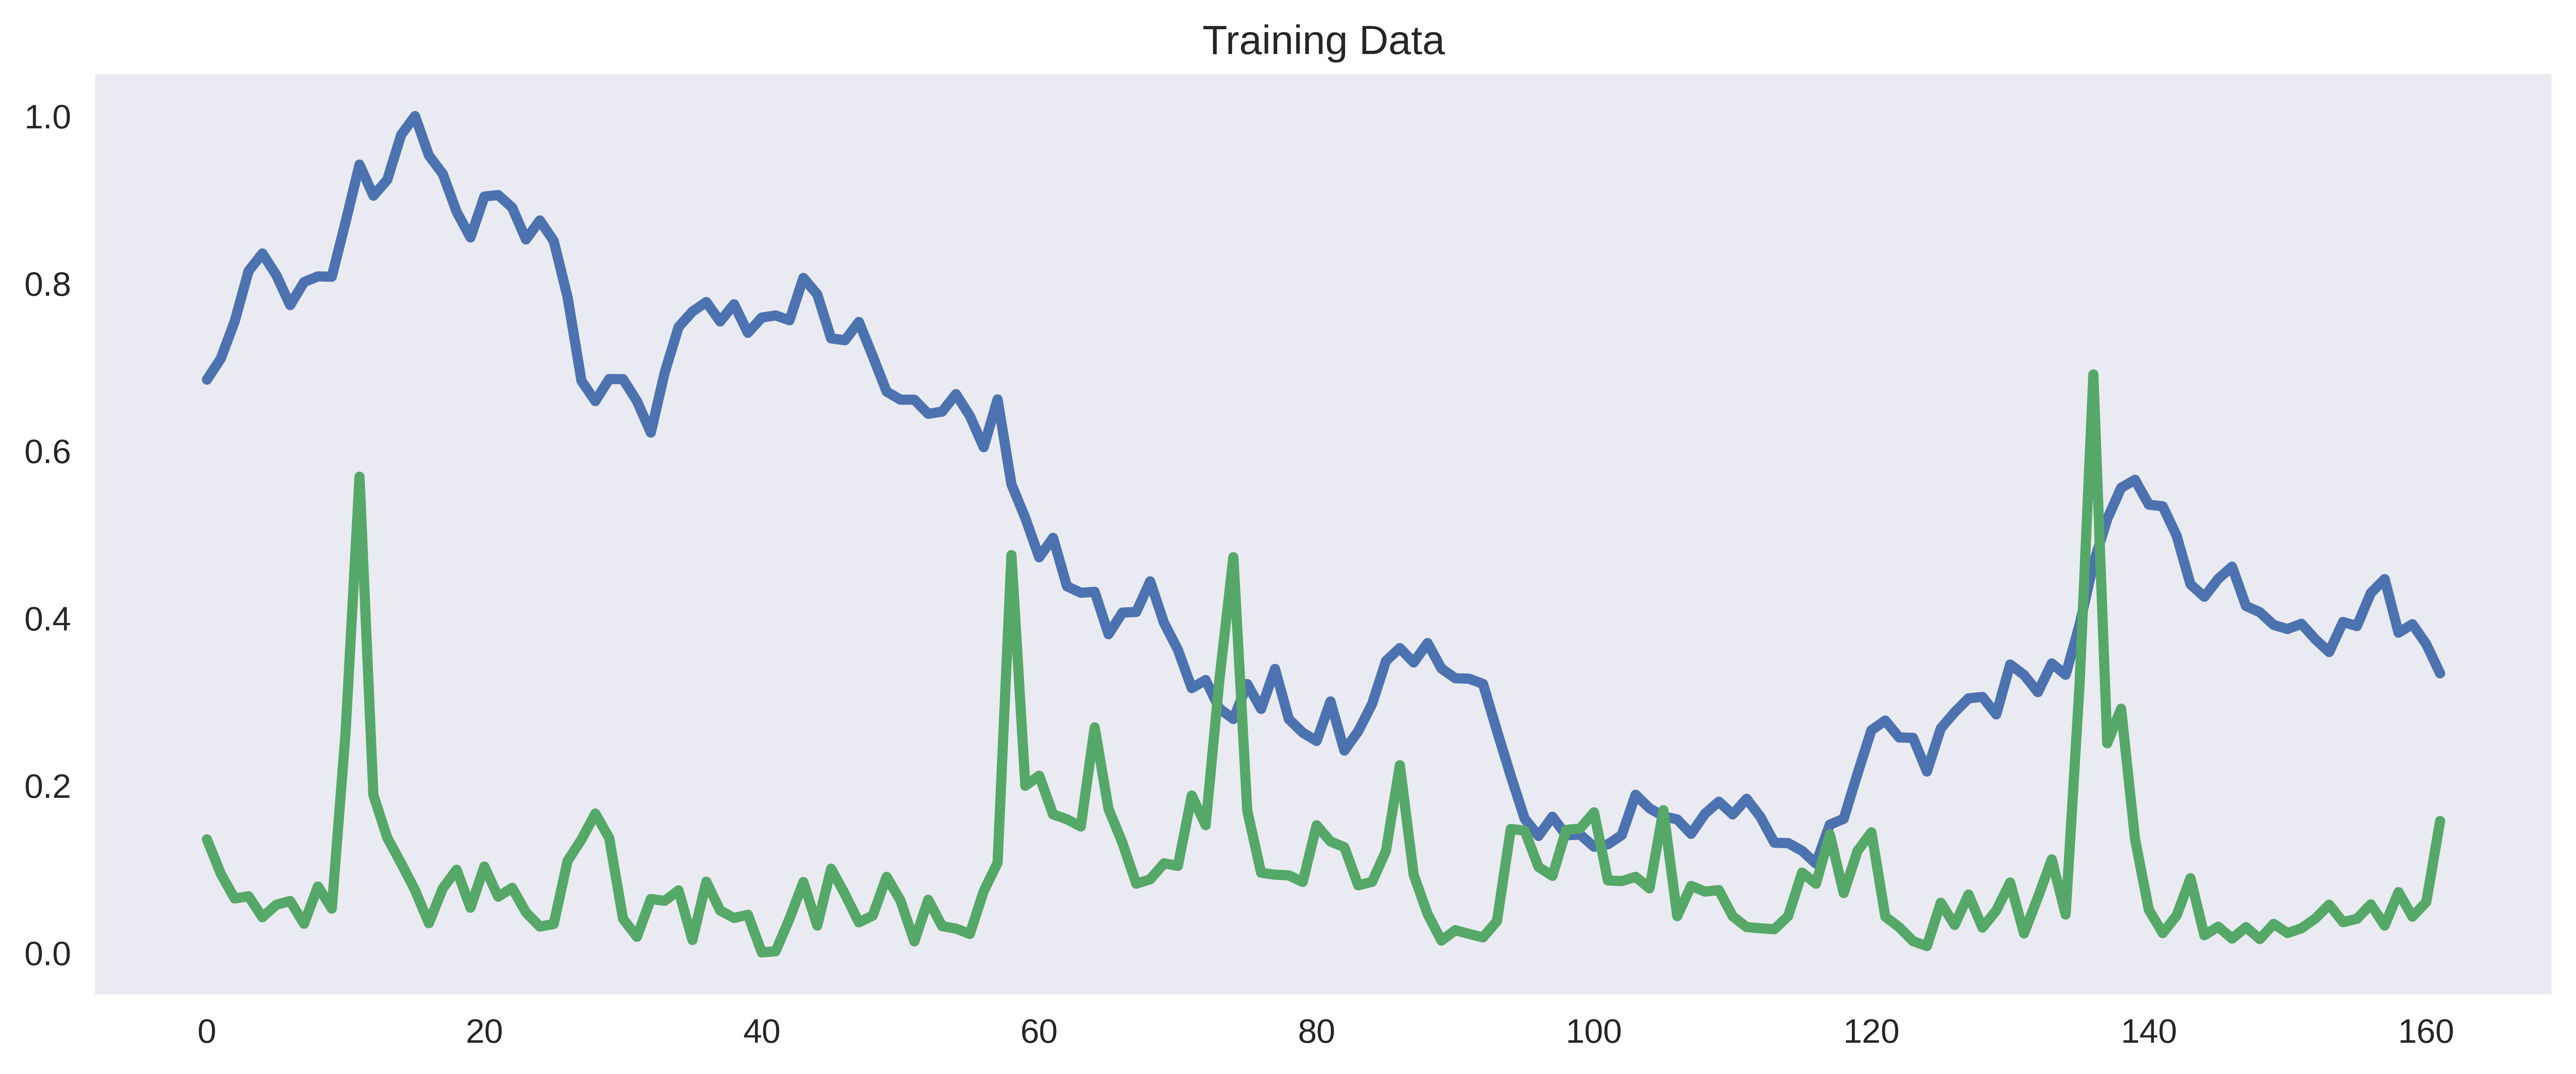

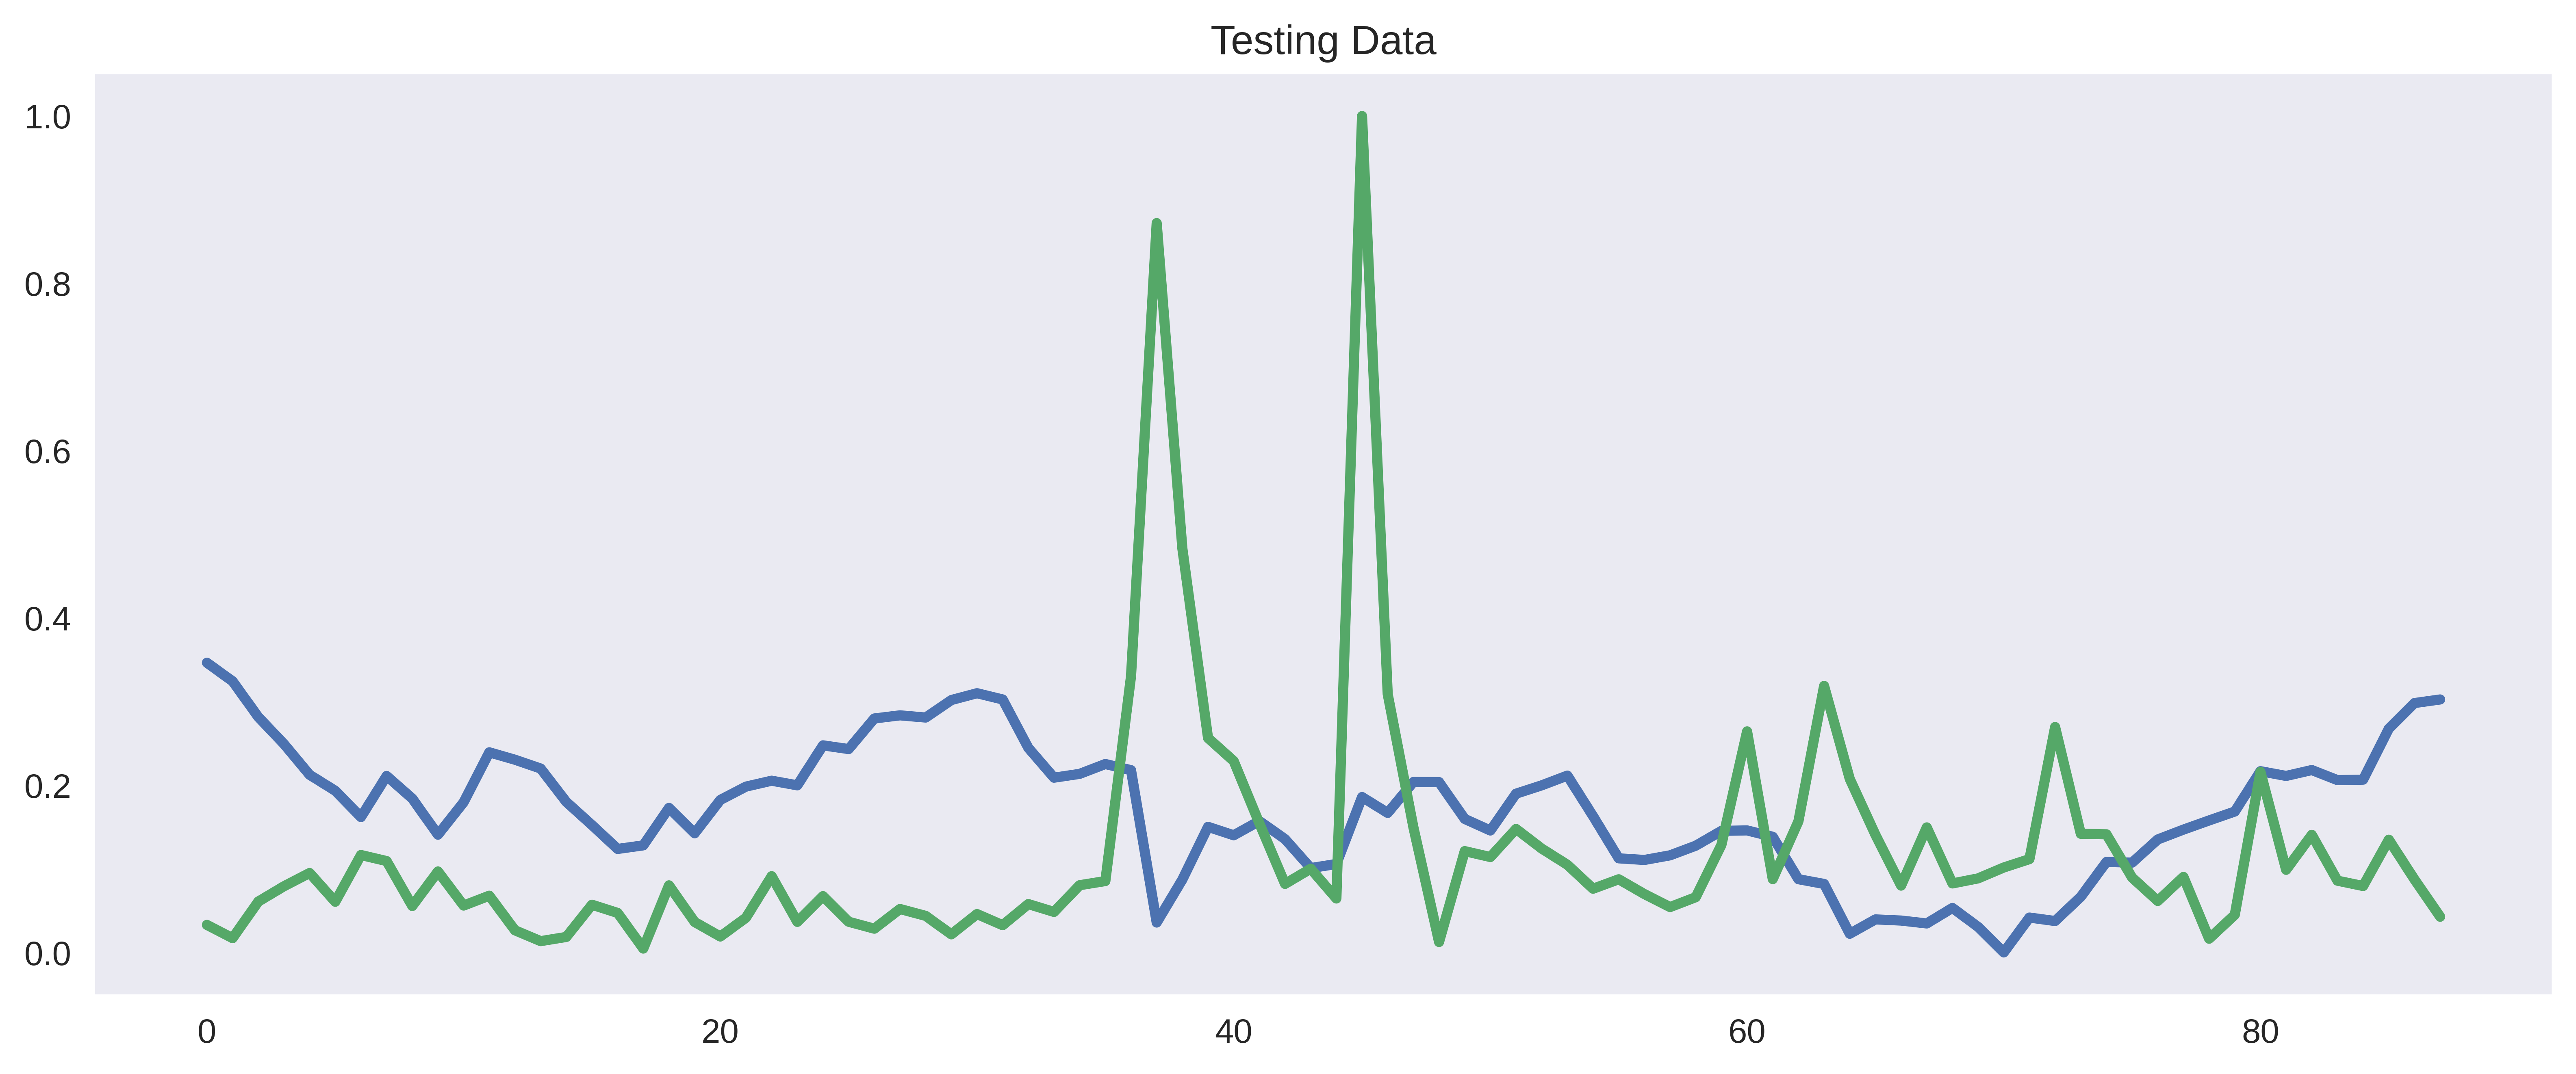

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.6387701097683609


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.66279099],
       [0.68458804],
       [0.72392315],
       [0.7779839 ],
       [0.79638214],
       [0.77341871],
       [0.74128293],
       [0.76548252],
       [0.77250048],
       [0.77158117],
       [0.83505611],
       [0.90268427],
       [0.86136064],
       [0.87748278],
       [0.92500922],
       [0.94462986],
       [0.90150657],
       [0.88257763],
       [0.84234853],
       [0.813787  ],
       [0.85872908],
       [0.85960227],
       [0.84650706],
       [0.81155744],
       [0.83161504],
       [0.80965322],
       [0.75085889],
       [0.66154009],
       [0.64040474],
       [0.66344605],
       [0.6613288 ],
       [0.63736589],
       [0.60445179],
       [0.66874135],
       [0.71802642],
       [0.73335279],
       [0.74511911],
       [0.72350366],
       [0.74185944],
       [0.71120368],
       [0.72670024],
       [0.72896899],
       [0.72454509],
       [0.7709928 ],
       [0.75224796],
       [0.70636562],
       [0.70374545],
       [0.722

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

250

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2022-01-26
1,2022-01-27
2,2022-01-28
3,2022-01-31
4,2022-02-01
...,...
245,2023-01-18
246,2023-01-19
247,2023-01-20
248,2023-01-23


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2022-01-26,0.684816
1,2022-01-27,0.710030
2,2022-01-28,0.754503
3,2022-01-31,0.814630
4,2022-02-01,0.835689
...,...,...
245,2023-01-18,0.206013
246,2023-01-19,0.206567
247,2023-01-20,0.267526
248,2023-01-23,0.298144


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2022-01-26,0.684816,0.662791
1,2022-01-27,0.710030,0.684588
2,2022-01-28,0.754503,0.723923
3,2022-01-31,0.814630,0.777984
4,2022-02-01,0.835689,0.796382
...,...,...,...
245,2023-01-18,0.206013,0.231721
246,2023-01-19,0.206567,0.232087
247,2023-01-20,0.267526,0.287981
248,2023-01-23,0.298144,0.314501


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2022-01-26,133.600006,14569900,135.419998
1,2022-01-27,135.419998,11913900,138.630005
2,2022-01-28,138.630005,10011700,142.970001
3,2022-01-31,142.970001,10185500,144.490005
4,2022-02-01,144.490005,8573300,142.619995
...,...,...,...,...
246,2023-01-19,99.080002,10973600,103.480003
247,2023-01-20,103.480003,14540500,105.690002
248,2023-01-23,105.690002,11479100,106.000000
249,2023-01-24,106.000000,8606700,108.120003


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2022-01-26,133.600006,14569900,135.419998
1,2022-01-27,135.419998,11913900,138.630005
2,2022-01-28,138.630005,10011700,142.970001
3,2022-01-31,142.970001,10185500,144.490005
4,2022-02-01,144.490005,8573300,142.619995
...,...,...,...,...
246,2023-01-19,99.080002,10973600,103.480003
247,2023-01-20,103.480003,14540500,105.690002
248,2023-01-23,105.690002,11479100,106.000000
249,2023-01-24,106.000000,8606700,108.120003


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.33600006e+02, 1.45699000e+07],
       [1.35419998e+02, 1.19139000e+07],
       [1.38630005e+02, 1.00117000e+07],
       [1.42970001e+02, 1.01855000e+07],
       [1.44490005e+02, 8.57330000e+06],
       [1.42619995e+02, 9.52990000e+06],
       [1.40029999e+02, 9.82060000e+06],
       [1.42020004e+02, 8.06110000e+06],
       [1.42509995e+02, 1.09375000e+07],
       [1.42479996e+02, 9.23170000e+06],
       [1.47229996e+02, 2.28774000e+07],
       [1.52160004e+02, 4.25003000e+07],
       [1.49470001e+02, 1.79752000e+07],
       [1.50850006e+02, 1.46947000e+07],
       [1.54720001e+02, 1.27260000e+07],
       [1.56350006e+02, 1.06564000e+07],
       [1.52949997e+02, 8.11030000e+06],
       [1.51360001e+02, 1.07855000e+07],
       [1.48089996e+02, 1.22272000e+07],
       [1.45869995e+02, 9.30070000e+06],
       [1.49399994e+02, 1.24755000e+07],
       [1.49529999e+02, 1.01495000e+07],
       [1.48460007e+02, 1.08347000e+07],
       [1.45699997e+02, 8.94400000e+06],
       [1.473399

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.68481577]),
 array([0.7100304]),
 array([0.75450265]),
 array([0.81463004]),
 array([0.83568856]),
 array([0.80978097]),
 array([0.77389851]),
 array([0.80146855]),
 array([0.808257]),
 array([0.80784139]),
 array([0.87364909]),
 array([0.94195066]),
 array([0.90468268]),
 array([0.92380162]),
 array([0.9774175]),
 array([1.]),
 array([0.95289542]),
 array([0.93086721]),
 array([0.88556374]),
 array([0.85480729]),
 array([0.90371278]),
 array([0.90551391]),
 array([0.89068997]),
 array([0.85245209]),
 array([0.87517305]),
 array([0.85065118]),
 array([0.78345798]),
 array([0.68343027]),
 array([0.65918532]),
 array([0.68550832]),
 array([0.68536985]),
 array([0.65918532]),
 array([0.62150175]),
 array([0.6931282]),
 array([0.74771398]),
 array([0.76614016]),
 array([0.77763922]),
 array([0.75436396]),
 array([0.77500688]),
 array([0.74078685]),
 array([0.75907458]),
 array([0.76156823]),
 array([0.75574947]),
 array([0.80645609]),
 array([0.78678308]),
 array([0.73413688]),
 

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((175, 1, 1), (75, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
5/5 [==============================] - 9s 354ms/step - loss: 0.2984 - val_loss: 0.1042
Epoch 2/20
5/5 [==============================] - 0s 19ms/step - loss: 0.2618 - val_loss: 0.0776
Epoch 3/20
5/5 [==============================] - 0s 17ms/step - loss: 0.2088 - val_loss: 0.0440
Epoch 4/20
5/5 [==============================] - 0s 18ms/step - loss: 0.1393 - val_loss: 0.0125
Epoch 5/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0632 - val_loss: 0.0168
Epoch 6/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0338 - val_loss: 0.0708
Epoch 7/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0495 - val_loss: 0.0451
Epoch 8/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0314 - val_loss: 0.0151
Epoch 9/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0290 - val_loss: 0.0082
Epoch 10/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0314 - val_loss: 0.0089
Epoch 11/20
5/5 [===========

In [102]:
# Make prediction
predicted = model.predict(X)

8/8 [==============================] - 1s 4ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.66943675,
 0.6948338,
 0.74042785,
 0.803704,
 0.82631105,
 0.79853123,
 0.76063395,
 0.7896922,
 0.796908,
 0.79646564,
 0.86764884,
 0.9439299,
 0.90200454,
 0.9234217,
 0.98450655,
 1.0106866,
 0.95638096,
 0.9313852,
 0.88077927,
 0.8470365,
 0.90092313,
 0.90293163,
 0.8864513,
 0.844473,
 0.8693242,
 0.8425148,
 0.77066475,
 0.6680507,
 0.64395547,
 0.67012984,
 0.6699913,
 0.64395547,
 0.6071011,
 0.6777732,
 0.7334018,
 0.7525281,
 0.7645535,
 0.74028414,
 0.76179457,
 0.72625697,
 0.74517316,
 0.7477661,
 0.7417209,
 0.79499143,
 0.77416474,
 0.7194215,
 0.7171478,
 0.73970973,
 0.6976447,
 0.65520847,
 0.6455981,
 0.6455981,
 0.6289638,
 0.6315449,
 0.6521828,
 0.62652206,
 0.59027356,
 0.6460089,
 0.5482295,
 0.51085186,
 0.46832648,
 0.48926467,
 0.43766037,
 0.43087143,
 0.43183953,
 0.38815808,
 0.41032133,
 0.4109184,
 0.44277143,
 0.39973286,
 0.3724742,
 0.33443323,
 0.3423954,
 0.3144965,
 0.3044666,
 0.3384088,
 0.314161,
 0.35338697,
 0.30435562,
 0.2915353,
 0.2

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2022-01-27
2,2022-01-28
3,2022-01-31
4,2022-02-01
5,2022-02-02
...,...
246,2023-01-19
247,2023-01-20
248,2023-01-23
249,2023-01-24


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2022-01-27,0.669437
2,2022-01-28,0.694834
3,2022-01-31,0.740428
4,2022-02-01,0.803704
5,2022-02-02,0.826311
...,...,...
246,2023-01-19,0.247171
247,2023-01-20,0.247597
248,2023-01-23,0.295281
249,2023-01-24,0.319875


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2022-01-27,0.669437,0.710030
2,2022-01-28,0.694834,0.754503
3,2022-01-31,0.740428,0.814630
4,2022-02-01,0.803704,0.835689
5,2022-02-02,0.826311,0.809781
...,...,...,...
246,2023-01-19,0.247171,0.206567
247,2023-01-20,0.247597,0.267526
248,2023-01-23,0.295281,0.298144
249,2023-01-24,0.319875,0.302438


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")